In [319]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Optimization
from sklearn.model_selection import GridSearchCV

In [320]:
#Import Data
df=pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [321]:
#Check head
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [322]:
#Check info
df.info()
#There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [323]:
#Check Stats
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [324]:
df.isna().sum()
#There are no missing values

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [325]:
#Check for object datatype columns
df.select_dtypes('object').columns

Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [326]:
#Check each column and perform necessary encoding
df['Customer'].nunique()
#Customer column will not be usefull as data for each of the row in this column is unique and will
#not be useful to train our model
#Hence we will drop it

9134

In [327]:
df=df.drop('Customer',axis=1)

In [328]:
df['Country'].nunique()

1

In [329]:
df['Country'].value_counts()
#For country column there is only one unique value hence this will not be helpful for training
#out model
#Hence we will just drop that column

US    9134
Name: Country, dtype: int64

In [330]:
df=df.drop('Country',axis=1)

In [331]:
df['State Code'].nunique()

5

In [332]:
df['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [333]:
df=pd.concat([df.drop('State Code',axis=1),pd.get_dummies(df['State Code'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [334]:
df['State'].nunique()

5

In [335]:
#This are same values as State Code
df['State'].value_counts()
#Hence considering as data duplication we will just drop it

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [336]:
df=df.drop('State',axis=1)

In [337]:
df['Response'].nunique()

2

In [338]:
df['Response'].value_counts()
#Since there are only two unique values we will LabelEncode the column

No     7826
Yes    1308
Name: Response, dtype: int64

In [339]:
le=LabelEncoder()
df['Response']=le.fit_transform(df['Response'])

In [340]:
df['Coverage'].nunique()

3

In [341]:
df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [342]:
df=pd.concat([df.drop('Coverage',axis=1),pd.get_dummies(df['Coverage'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [343]:
df['Education'].nunique()

5

In [344]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [345]:
df=pd.concat([df.drop('Education',axis=1),pd.get_dummies(df['Education'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [346]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],format='%m/%d/%y')
#Change the datatype of Effective to date to timestamp

In [347]:
df['Effective To Date'].dt.year.nunique()
#Data has been taken for only one year hence we will not bifurcate year from this column
#Instead we will only create a new clumn for month

1

In [348]:
df['Effective Month']=df['Effective To Date'].dt.month

In [349]:
#Drop Effective to Date column as month has already been extracted
df=df.drop('Effective To Date',axis=1)

In [350]:
df['EmploymentStatus'].nunique()

5

In [351]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [352]:
df=pd.concat([df.drop('EmploymentStatus',axis=1),pd.get_dummies(df['EmploymentStatus'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [353]:
df['Gender'].nunique()
#Since there are only two values we will label encode it

2

In [354]:
df['Gender']=le.fit_transform(df['Gender'])

In [355]:
df['Location Code'].nunique()

3

In [356]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [357]:
df=pd.concat([df.drop('Location Code',axis=1),pd.get_dummies(df['Location Code'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [358]:
df['Marital Status'].nunique()

3

In [359]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [360]:
df['Marital Status']=le.fit_transform(df['Marital Status'])

In [361]:
df['Policy Type'].nunique()

3

In [362]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [363]:
df=pd.concat([df.drop('Policy Type',axis=1),pd.get_dummies(df['Policy Type'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [364]:
df['Policy'].nunique()

9

In [365]:
df['Policy'].value_counts()
#We will LabelEncode this values

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [366]:
df['Policy']=le.fit_transform(df['Policy'])

In [367]:
df['Claim Reason'].nunique()

4

In [368]:
df['Claim Reason'].value_counts()

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64

In [369]:
df['Claim Reason']=le.fit_transform(df['Claim Reason'])

In [370]:
df['Sales Channel'].nunique()

4

In [371]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [372]:
df['Sales Channel']=le.fit_transform(df['Sales Channel'])

In [373]:
df['Vehicle Class'].nunique()

6

In [374]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [375]:
df=pd.concat([df.drop('Vehicle Class',axis=1),pd.get_dummies(df['Vehicle Class'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [376]:
df['Vehicle Size'].nunique()

3

In [377]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [378]:
df=pd.concat([df.drop('Vehicle Size',axis=1),pd.get_dummies(df['Vehicle Size'])],axis=1)
#We have encoded the values in different columns so that model does not consider it as a rank or order

In [379]:
#Check for object types again
df.select_dtypes('object').columns
#There are no columns for object type

Index([], dtype='object')

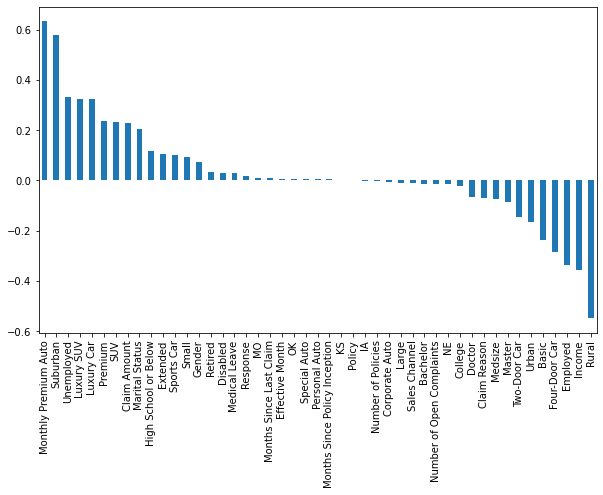

In [380]:
#Check for correlation
plt.figure(figsize=(10,6))
df.corr()['Total Claim Amount'].drop('Total Claim Amount').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [381]:
df.corr()['Total Claim Amount'].drop('Total Claim Amount').sort_values(ascending=False)

Monthly Premium Auto             0.632017
Suburban                         0.578640
Unemployed                       0.332138
Luxury SUV                       0.325004
Luxury Car                       0.323061
Premium                          0.235561
SUV                              0.230744
Claim Amount                     0.226451
Marital Status                   0.204675
High School or Below             0.115995
Extended                         0.104822
Sports Car                       0.101023
Small                            0.093198
Gender                           0.074564
Retired                          0.034293
Disabled                         0.030123
Medical Leave                    0.029028
Response                         0.016877
MO                               0.009318
Months Since Last Claim          0.007563
Effective Month                  0.006820
OK                               0.005247
Special Auto                     0.004566
Personal Auto                    0

In [382]:
#We will drop columns which has correlation less than 0.01

In [383]:
for x in df.columns:
    if abs(df.corr()['Total Claim Amount'][x]) < 0.01:
        df=df.drop(x,axis=1)

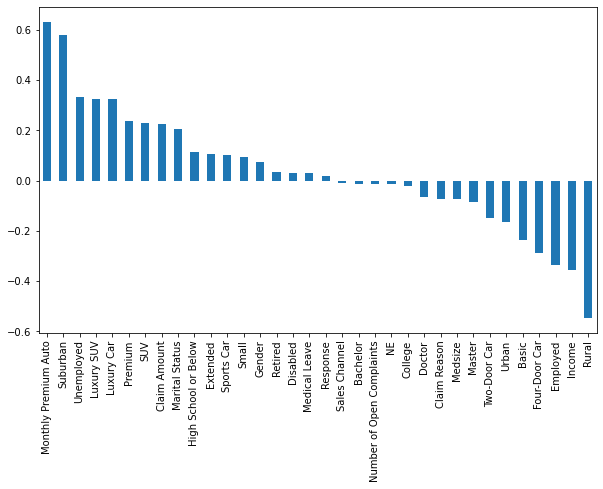

In [384]:
#Check for correlation
plt.figure(figsize=(10,6))
df.corr()['Total Claim Amount'].drop('Total Claim Amount').sort_values(ascending=False).plot(kind='bar')
plt.show()

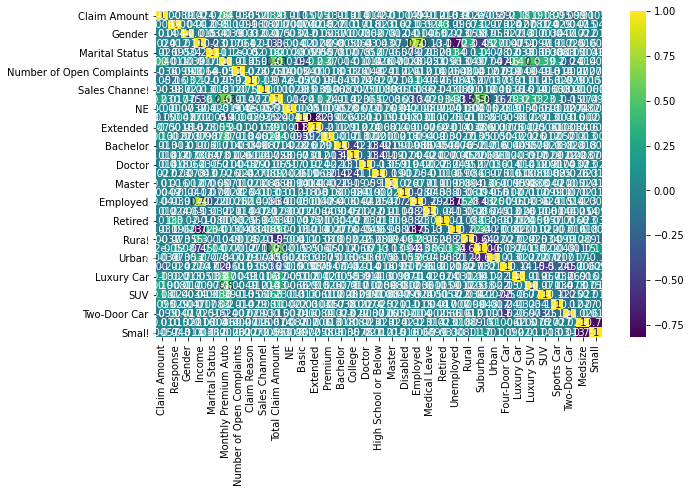

In [385]:
#Check for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [386]:
#Check for skewness
df.skew()

Claim Amount                 3.032280
Response                     2.037567
Gender                       0.039866
Income                       0.286887
Marital Status              -0.107553
Monthly Premium Auto         2.123546
Number of Open Complaints    2.783263
Claim Reason                 0.733526
Sales Channel                0.506774
Total Claim Amount           1.714966
NE                           1.610436
Basic                       -0.449361
Extended                     0.871991
Premium                      2.861258
Bachelor                     0.868583
College                      0.907014
Doctor                       4.873839
High School or Below         0.941559
Master                       3.068871
Disabled                     4.427858
Employed                    -0.511300
Medical Leave                4.266045
Retired                      5.425089
Unemployed                   1.132463
Rural                        1.547052
Suburban                    -0.550594
Urban       

In [387]:
for x in df.columns.drop('Total Claim Amount'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x])

In [388]:
df.skew()

Claim Amount                 0.578248
Response                     2.037567
Gender                       0.039866
Income                       0.286887
Marital Status              -0.107553
Monthly Premium Auto         1.013663
Number of Open Complaints    1.999011
Claim Reason                 0.226491
Sales Channel                0.506774
Total Claim Amount           1.714966
NE                           1.610436
Basic                       -0.449361
Extended                     0.871991
Premium                      2.861258
Bachelor                     0.868583
College                      0.907014
Doctor                       4.873839
High School or Below         0.941559
Master                       3.068871
Disabled                     4.427858
Employed                    -0.511300
Medical Leave                4.266045
Retired                      5.425089
Unemployed                   1.132463
Rural                        1.547052
Suburban                    -0.550594
Urban       

In [389]:
pt=PowerTransformer()

In [390]:
for x in df.columns.drop('Total Claim Amount'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [391]:
#Standardize/Normalize the data
scale=MinMaxScaler()

In [392]:
X=df.drop('Total Claim Amount',axis=1)
y=df['Total Claim Amount']

In [393]:
X=scale.fit_transform(X)

In [394]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [395]:
model_sel(LinearRegression)

Max Score is 0.7717777695513552 at max state 77


In [396]:
model_sel(Ridge)

Max Score is 0.7713982748657118 at max state 77


In [397]:
model_sel(Lasso)

Max Score is 0.7713279067628426 at max state 77


In [398]:
model_sel(ElasticNet)

Max Score is 0.46686743270560094 at max state 77


In [399]:
model_sel(KNeighborsRegressor)

Max Score is 0.7696854431302 at max state 90


In [400]:
model_sel(DecisionTreeRegressor)

Max Score is 0.7327547905383437 at max state 43


In [401]:
model_sel(RandomForestRegressor)

Max Score is 0.8539388478889611 at max state 75


In [402]:
model_sel(SVR)

Max Score is 0.4316770610037185 at max state 100


In [403]:
model_sel(AdaBoostRegressor)

Max Score is 0.7562866872583736 at max state 49


In [404]:
#From the above results max score is for RandomForestRegressor at 83 random state

In [405]:
#we will try to hypertune the parameters of RandomForestRegressor

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=75)

In [407]:
param={'n_estimators':[100,110,130,150,170,210,230,270,310,330,350,370,390,510]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [408]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 110, 130, 150, 170, 210, 230,
                                          270, 310, 330, 350, 370, 390, 510]})

In [410]:
gscv.best_params_

{'n_estimators': 350}

In [411]:
rf=RandomForestRegressor(n_estimators=350)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [412]:
print("r2score is {}".format(r2_score(y_test,predict)))
print("MAE is {}".format(mean_absolute_error(y_test,predict)))
print("MSE is {}".format(mean_squared_error(y_test,predict)))

r2score is 0.855714539962086
MAE is 72.19218850621941
MSE is 12555.619963446004


In [413]:
result=pd.DataFrame(y_test)

In [414]:
result=pd.concat([result.reset_index().drop('index',axis=1),pd.Series(predict)],axis=1)

In [415]:
result.columns=['Total Claim Amount','Total Predicted Claim Amount']

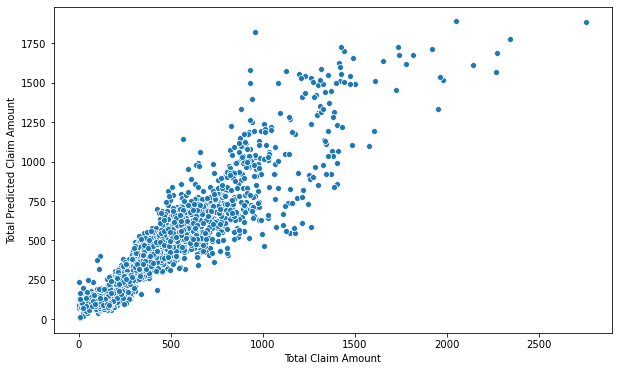

In [416]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Claim Amount',y='Total Predicted Claim Amount',data=result)
plt.show()
#The below plot shows linear behaviour in predicted and original values which is satisfactory

In [417]:
#Save the model
joblib.dump(rf,'Auto Insurance Claim Amount RF.obj')

['Auto Insurance Claim Amount RF.obj']